# SimpleElastix Tutorial
2020-07-01 (Wed.)

SimpleElastix is an extension of SimpleITK package, allows the running of Elastix** in a Python environment. This tutorial notebook will go over some of the basics of using SimpleITK and SimpleElastix. The methods used in the hackathon will be including here as well.

** Elastix is a powerful open-source command line program that provides intensity based non-rigid registration for medical imaging.

In [1]:
import SimpleITK as sitk

In [2]:
# write output to a separate directory
OUTPUT_DIR = '/media/jc/NVME_SSD/TEMP/'

## Utility functions
A number of utility callback functions for image display and for plotting the similarity metric during registration.

In [12]:
import matplotlib.pyplot as plt

from ipywidgets import interact, fixed
from IPython.display import clear_output


# Callback invoked by the interact IPython method for scrolling through the image stacks of
# the two images (moving and fixed).
def display_images(fixed_npa, moving_npa):
    # Create a figure with two subplots and the specified size.
    plt.subplots(1,2,figsize=(10,8))
    
    # Draw the fixed image in the first subplot.
    plt.subplot(1,2,1)
    plt.imshow(fixed_npa, cmap=plt.cm.Greys_r);
    plt.title('fixed image')
    plt.axis('off')
    
    # Draw the moving image in the second subplot.
    plt.subplot(1,2,2)
    plt.imshow(moving_npa, cmap=plt.cm.Greys_r);
    plt.title('moving image')
    plt.axis('off')
    
    plt.show()

    
# Callback invoked by the IPython interact method for scrolling and modifying the alpha blending
# of an image stack of two images that occupy the same physical space. 
def display_images_with_alpha(image_z, alpha, fixed, moving):
    img = (1.0 - alpha)*fixed[:,:,image_z] + alpha*moving[:,:,image_z] 
    plt.imshow(sitk.GetArrayViewFromImage(img),cmap=plt.cm.Greys_r);
    plt.axis('off')
    plt.show()
    
    
# Callback invoked when the StartEvent happens, sets up our new data.
def start_plot():
    global metric_values, multires_iterations
    
    metric_values = []
    multires_iterations = []

    
# Callback invoked when the EndEvent happens, do cleanup of data and figure.
def end_plot():
    global metric_values, multires_iterations
    
    del metric_values
    del multires_iterations
    # Close figure, we don't want to get a duplicate of the plot latter on.
    plt.close()

    
# Callback invoked when the IterationEvent happens, update our data and display new figure.
def plot_values(registration_method):
    global metric_values, multires_iterations
    
    metric_values.append(registration_method.GetMetricValue())                                       
    # Clear the output area (wait=True, to reduce flickering), and plot current data
    clear_output(wait=True)
    # Plot the similarity metric values
    plt.plot(metric_values, 'r')
    plt.plot(multires_iterations, [metric_values[index] for index in multires_iterations], 'b*')
    plt.xlabel('Iteration Number',fontsize=12)
    plt.ylabel('Metric Value',fontsize=12)
    plt.show()

    
# Callback invoked when the sitkMultiResolutionIterationEvent happens, update the index into the 
# metric_values list. 
def update_multires_iterations():
    global metric_values, multires_iterations
    multires_iterations.append(len(metric_values))

## Reading images
Images should be read with SimpleITK ReadImage function. When reading make sure to cast the pixels to the type required for registration (Float32 or Float64).

In [16]:
fixed_image =  sitk.ReadImage(
    '/media/jc/NVME_SSD/SageBionetworks/normalBreast/R1_PCNA.CD8.PD1.CK19_SMT130-4_2019_05_08__12_15__1613S-Scene-012_c2_ORG.tif', 
    sitk.sitkFloat32  # casting pixels to Float32
)
moving_image = sitk.ReadImage(
    '/media/jc/NVME_SSD/SageBionetworks/normalBreast/R2_CK5.HER2.ER.CD45_SMT130-4_2019_05_09__21_52__1654S-Scene-012_c2_ORG.tif', 
    sitk.sitkFloat32  # casting pixels to Float32
) 

## Viewing images with matplotlib
SimpleITK provides a function (GetArrayViewFromImage(..)) to convert a SimpleITK image to numpy format, which can be then used to view usign matplotlib approaches.

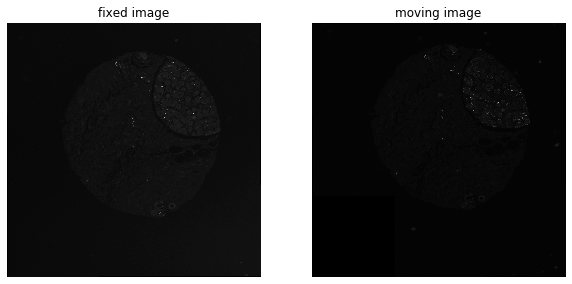

In [17]:
# display the images
fixed_image_numpy = sitk.GetArrayViewFromImage(fixed_image)
moving_image_numpy = sitk.GetArrayViewFromImage(moving_image)

display_images(fixed_image_numpy, moving_image_numpy)

## SimpleElastix

In [25]:
selx = sitk.ElastixImageFilter()

help(selx)

Help on ElastixImageFilter in module SimpleITK.SimpleITK object:

class ElastixImageFilter(builtins.object)
 |  Proxy of C++ itk::simple::ElastixImageFilter class.
 |  
 |  Methods defined here:
 |  
 |  AddFixedImage(self, fixedImage)
 |      AddFixedImage(ElastixImageFilter self, Image fixedImage) -> ElastixImageFilter
 |  
 |  AddFixedMask(self, fixedMask)
 |      AddFixedMask(ElastixImageFilter self, Image fixedMask) -> ElastixImageFilter
 |  
 |  AddMovingImage(self, movingImage)
 |      AddMovingImage(ElastixImageFilter self, Image movingImage) -> ElastixImageFilter
 |  
 |  AddMovingMask(self, movingMask)
 |      AddMovingMask(ElastixImageFilter self, Image movingMask) -> ElastixImageFilter
 |  
 |  AddParameter(self, *args)
 |      AddParameter(ElastixImageFilter self, std::string const key, std::string const value) -> ElastixImageFilter
 |      AddParameter(ElastixImageFilter self, unsigned int const index, std::string const key, std::string const value) -> ElastixImageFilter
